**Master Universitario en Bioinformática y Biología Computacional, UAM**
## **Minería de texto 2025-26**
# **Práctica de laboratorio 2: Word embeddings**

---

_Aviso_: algunas de las explicaciones y ejemplos de este notebook proceden de [Documentación de GenSim en NLTK](https://www.nltk.org/howto/gensim.html)

Antes de comenzar a trabajar, debemos configurar el entorno: 
- NLTK
- GenSim: permite trabajar con embeddings de palabras empleando Word2Vec, FastText y Doc2Vec.

Si no lo tenemos ya instalado, instalemos NLTK:

!pip install nltk

Ahora instalemos GenSim para poder trabajar con Word2Vec:

!pip install gensim

In [ ]:
# Si necesario (yo sí necesitaba instalar ambos)

#!pip install pytest
#!pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   --------- ------------------------------ 6.0/24.4 MB 30.7 MB/s eta 0:00:01
   --------------------- ------------------ 13.1/24.4 MB 31.6 MB/s eta 0:00:01
   --------------------------------- ------ 20.7/24.4 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------  24.4/24.4 MB 32.9 MB/s eta 0:00:01
   ---------------------------------------- 24.4/24.4 MB 25.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from nltk.test.gensim_fixt import setup_module
setup_module() # Puede que antes tengamos que ejecutar: !pip install pytest

Si no está ya instalado, descarguemos el corpus Brown de entre los disponibles en NLTK. Este es un corpus en inglés creado en 1961 en la Universidad de Brown. Cuenta con un millón de palabras con texto de 500 fuentes (noticias, editorial, etc.)

In [6]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\Daniel
[nltk_data]     Parra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

Para probar, nos bastará con tomar 10000 oraciones del corpus.

In [7]:
from nltk.corpus import brown
train_set = brown.sents()[:10000]

Entrenamos el modelo empleando el Word2Vec de GenSim:

In [8]:
import gensim
model = gensim.models.Word2Vec(train_set)

Si se usa un corpus muy grande, puede llevar mucho tiempo entrenarlo. Lo más cómodo en esos casos es guardarlo y volver a cargarlo:

- `model.save('brown.embedding')` # para guardarlo

- `model = gensim.models.Word2Vec.load('brown.embedding')` # para recuperarlo

Veamos cuántas palabras contiene el modelo:

In [11]:
tot_palabras = model.corpus_total_words

print('El modelo contiene', tot_palabras, 'palabras.')

El modelo contiene 219770 palabras.


¿Cuáles son las 100 palabras más frecuentes?

In [12]:
top_freq_100 = model.wv.index_to_key[:100]

print('Las 100 palabras más frecuentes son:', top_freq_100)

Las 100 palabras más frecuentes son: ['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'is', 'that', 'for', '``', 'The', "''", 'was', 'as', 'on', 'with', 'be', 'it', 'by', 'at', 'he', 'his', 'are', ';', 'not', 'has', 'from', 'have', 'this', 'will', 'an', '--', 'which', 'who', '?', 'or', 'but', 'had', 'would', 'I', 'one', 'said', 'were', 'they', 'all', 'been', 'their', 'more', 'its', ':', ')', '(', 'He', 'Mr.', 'we', 'than', 'out', 'It', 'In', 'up', 'But', 'there', 'other', 'when', 'can', 'no', 'about', 'only', 'first', 'new', 'him', 'A', 'into', 'so', 'last', 'Mrs.', 'two', 'some', 'them', 'what', 'time', 'her', 'do', 'any', 'our', 'man', 'most', 'also', 'years', 'could', 'over', 'year', 'may', 'New', 'made', 'if', 'you', 'American']


Una vez entrenado, el modelo contendrá la lista de palabras en el vocabulario del corpus procesado, junto con el embedding correspondiente para cada palabra.

Puede obtenese el embedding de una palabra accediendo al diccionario `wv` (word vector) que tiene el modelo.

In [13]:
model.wv['university']

array([-0.03749723, -0.0295914 ,  0.04599127, -0.12271926, -0.01197173,
       -0.37937376,  0.12915371,  0.3983164 , -0.00201501, -0.29717222,
       -0.05841655, -0.29605252, -0.15677501,  0.2553639 ,  0.01256201,
       -0.0603805 ,  0.05082991, -0.19894981,  0.04807915, -0.3042397 ,
        0.0881337 ,  0.1571893 ,  0.37233946, -0.20820516,  0.02570407,
       -0.04859156, -0.14490137,  0.0042571 , -0.15714853, -0.00573632,
        0.12968998, -0.07610706,  0.08253661, -0.20087884, -0.12298757,
        0.12013808,  0.08241677, -0.16388424, -0.24467468, -0.14254531,
        0.10262974, -0.14742975, -0.20263787,  0.01358297,  0.07975667,
       -0.11571495, -0.25371632, -0.02528531,  0.15248752,  0.08875555,
       -0.00689642, -0.20291635,  0.06701262,  0.00181449,  0.00870941,
        0.12618214,  0.18857834, -0.11614159, -0.16957398,  0.03920883,
        0.00408351,  0.12499843,  0.10471388,  0.07070123, -0.14658125,
        0.31985494, -0.08597566,  0.22293088, -0.14872533,  0.03

y para calcular la similitud empleando la distancia coseno entre palabras:

In [14]:
model.wv.similarity('university','school')

0.9938205

Usando un modelo preentrenado. Podemos descargarlo, o emplear uno de los que tiene nltk:

In [15]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to C:\Users\Daniel
[nltk_data]     Parra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping models\word2vec_sample.zip.


True

Ahora podemos cargarlo:

In [16]:
from nltk.data import find

# fichero con los vectores en formato texto
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

Veamos cuáles son las 3 palabras más cercanas a 'university':

In [17]:
cerca_uni = model.most_similar(positive=['university'], topn = 3)

print('Las 3 palabras más cercanas a "university" son', cerca_uni)

Las 3 palabras más cercanas a "university" son [('universities', 0.7003918290138245), ('faculty', 0.6780906915664673), ('undergraduate', 0.6587096452713013)]


Obtenemos el vector de una palabra. Esta vez accesible directamente desde el modelo.

In [ ]:
model['queen']  # Previamente cambiamos la variable "model" por ello si intentaramos ejecutar el mismo comando que anteriormene para "university":
                # model.wv['queen']
                # termina dando error

array([ 0.00173332, -0.0474043 , -0.022896  ,  0.0407935 ,  0.0435346 ,
       -0.0293455 , -0.0235409 , -0.0715902 , -0.0651406 ,  0.0183813 ,
       -0.0249921 , -0.125767  ,  0.0343439 , -0.00026957,  0.043857  ,
        0.0372462 ,  0.0240246 , -0.015479  ,  0.0217673 ,  0.0311192 ,
        0.0628833 ,  0.045147  , -0.0780398 , -0.0391811 ,  0.021606  ,
       -0.0175751 , -0.101903  ,  0.030313  ,  0.0622383 , -0.0551438 ,
       -0.0515965 , -0.0432121 , -0.0272494 ,  0.0703003 , -0.117382  ,
       -0.0435346 ,  0.0317641 ,  0.0870691 , -0.0312804 ,  0.0606259 ,
        0.0353114 , -0.137376  ,  0.089004  , -0.00915032,  0.0580461 ,
       -0.0372462 , -0.00136046,  0.0480493 ,  0.0515965 ,  0.0883591 ,
       -0.00592554,  0.0325703 ,  0.0174944 , -0.0103193 , -0.0538539 ,
       -0.0191875 , -0.113512  , -0.0570787 ,  0.03773   , -0.0298292 ,
        0.044502  ,  0.0922288 , -0.0164464 ,  0.0428896 ,  0.0580461 ,
       -0.0732026 , -0.0039302 ,  0.0464369 , -0.059981  ,  0.03

Juguemos un poco...

¿cuál es la palabra que no encaja en una lista dada?

In [20]:
model.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])

'cereal'

¿qué vector sale si hacemos `'woman'+'king'-'man'`?

In [24]:
pal_similar = model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

print('Si hacemos "woman"+"king"-"man" obtenemos la palabra', pal_similar[0][0], 'con una similitud de', pal_similar[0][1])

Si hacemos "woman"+"king"-"man" obtenemos la palabra queen con una similitud de 0.7118193507194519


¿y qué saldrá de la operación `man + daughter - woman`?

In [26]:
pal_similar = model.most_similar(positive=['man', 'daughter'], negative=['woman'], topn=1)

print('Si hacemos "man"+"daughter"-"woman" obtenemos la palabra', pal_similar[0][0], 'con una similitud de', pal_similar[0][1])

Si hacemos "man"+"daughter"-"woman" obtenemos la palabra son con una similitud de 0.8490632772445679


Ojo, lo que nos devuelve es el vector más próximo. Si, por ejemplo, queremos sacar los 3 vectores más próximos:

In [28]:
pal_similar = model.most_similar(positive=['woman','king'], negative=['man'], topn = 3)

print(f'Si hacemos "woman"+"king"-"man" obtenemos las palabras: {pal_similar[0][0]}, {pal_similar[1][0]} y {pal_similar[2][0]};\ncon una similitud de: {pal_similar[0][1]}, {pal_similar[1][1]} y {pal_similar[2][1]} correspondientemente.')

Si hacemos "woman"+"king"-"man" obtenemos las palabras: queen, monarch y princess;
con una similitud de: 0.7118193507194519, 0.6189674139022827 y 0.5902430415153503 correspondientemente.


Podemos explorar más ejemplos para obtener analogías semánticas menos evidentes.

In [29]:
analogias = [
    (['Paris','Japan'], ['France']),
    (['teacher','hospital'], ['school'])
]

for pos, neg in analogias:
    print(pos, '-', neg, '→', model.most_similar(positive=pos, negative=neg, topn=3))

['Paris', 'Japan'] - ['France'] → [('Tokyo', 0.8142859935760498), ('Osaka', 0.6350962519645691), ('Seoul', 0.6054925322532654)]
['teacher', 'hospital'] - ['school'] → [('Hospital', 0.6331107020378113), ('nurse', 0.6280134916305542), ('doctor', 0.5242676734924316)]


### Ejercicio 1: Visualización de relaciones semánticas de embeddings mediante PCA

Usando el modelo Word2Vec previamente cargado, selecciona varios conjuntos de palabras que incluyan diferentes relaciones semánticas:
- Género de varias palabras: masculino, femenino
- Varios países y sus capitales
- Grados de varios adjetivos: positivo, comparativo, superlativo
- Palabras de la varias temáticas, p. ej., alimentos, medios de transporte, etc.

Reduce sus embeddings a dos dimensiones mediante PCA (Principal Component Analysis) y representa gráficamente las posiciones relativas de los embeddings de las palabras en el plano.

Observa si el modelo organiza de forma coherente las palabras; por ejemplo, king–queen vs. ..., Paris–France vs. ..., good–better–best vs. ..., apple-banana-grape vs. ....

##### Discute brevemente los resultados.

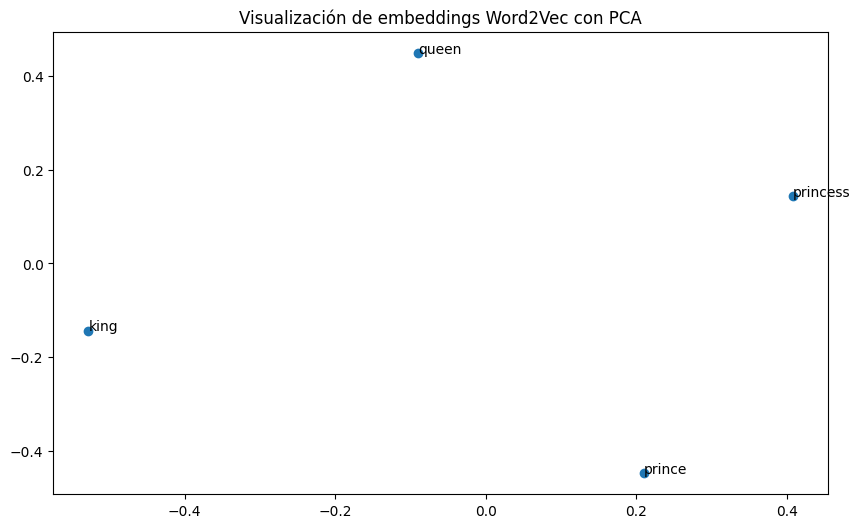

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Género
palabras = ['king', 'queen', 'prince', 'princess']   # No podemos utilizar 'emperor' y 'empress' porque no tiene la key "empress"
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, (coords[i,0], coords[i,1]))
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Podemos observar que al utilizar palabras del campo semántico de "familia real" `king`, `queen`, `prince` y `princess` obtenemos visualmente una clara relación semántica entre el género y el poder, dano lugar a un paralelogramo.

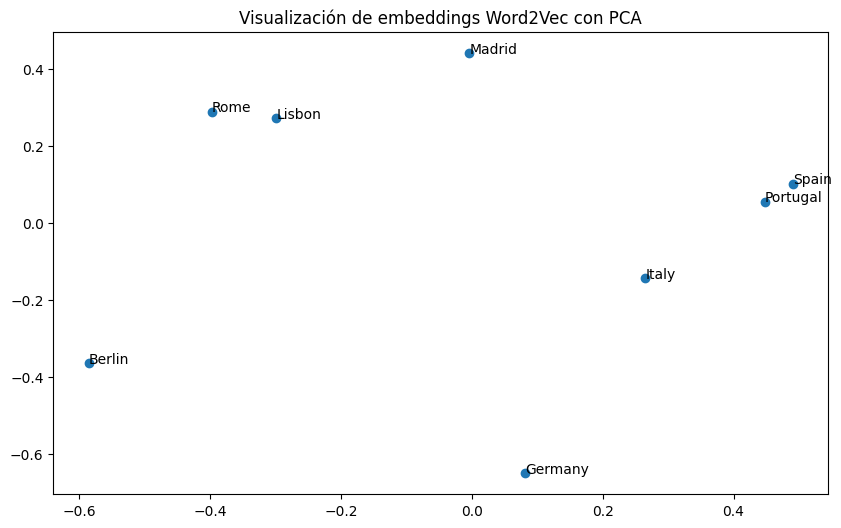

In [52]:
# Paises y capitales
palabras = ['Madrid', 'Spain', 'Rome', 'Italy', 'Berlin', 'Germany', 'Lisbon', 'Portugal']
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, (coords[i,0], coords[i,1]))
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Para los países y capitales también podemos observar una relación semantica, encontrándose las capitales superiores y hacia la izquierda de su país respectivo. Aunque no se forman líneas exactamente paralelas, es clara la relación semántica.

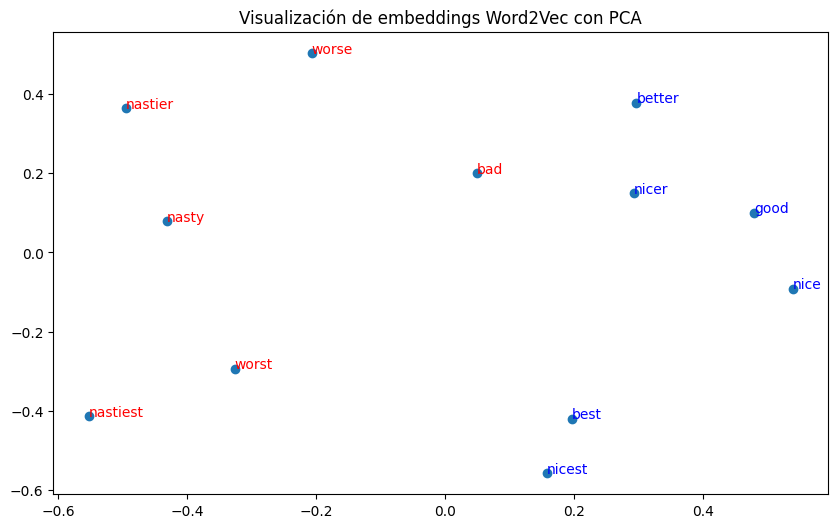

In [51]:
# Grados de varios adjetivos: positivo, comparativo, superlativo
palabras = ['good', 'better', 'best', 'nice', 'nicer', 'nicest', 'bad', 'worse', 'worst', 'nasty', 'nastier', 'nastiest']
vectores = [model[i] for i in palabras]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords = pca.fit_transform(vectores)

# Visualización
plt.figure(figsize=(10,6))
plt.scatter(coords[:,0], coords[:,1])
count=0
for i, palabra in enumerate(palabras):
    count+=1
    if count > 6:
        color='red'
    else:
        color='blue'

    plt.annotate(palabra, (coords[i,0], coords[i,1]), color=color)
plt.title("Visualización de embeddings Word2Vec con PCA")
plt.show()


Podemos observar dos cosas en este plot:
- La primera es que **el mismo adjetivo** en positivo, comparativo y superlativo forma un triángulo, una estructura que vemos repetida para cada uno.
- La segunda es la **distribución de los adjetivos**. Hay una clara separación entre adjetivos con una connotación negativa (en rojo) y positiva (en azul), lo que también se traduce en una mayor proximidad entre aquellas palabras que comparten un significado negativo y aquellas con un significado positivo.

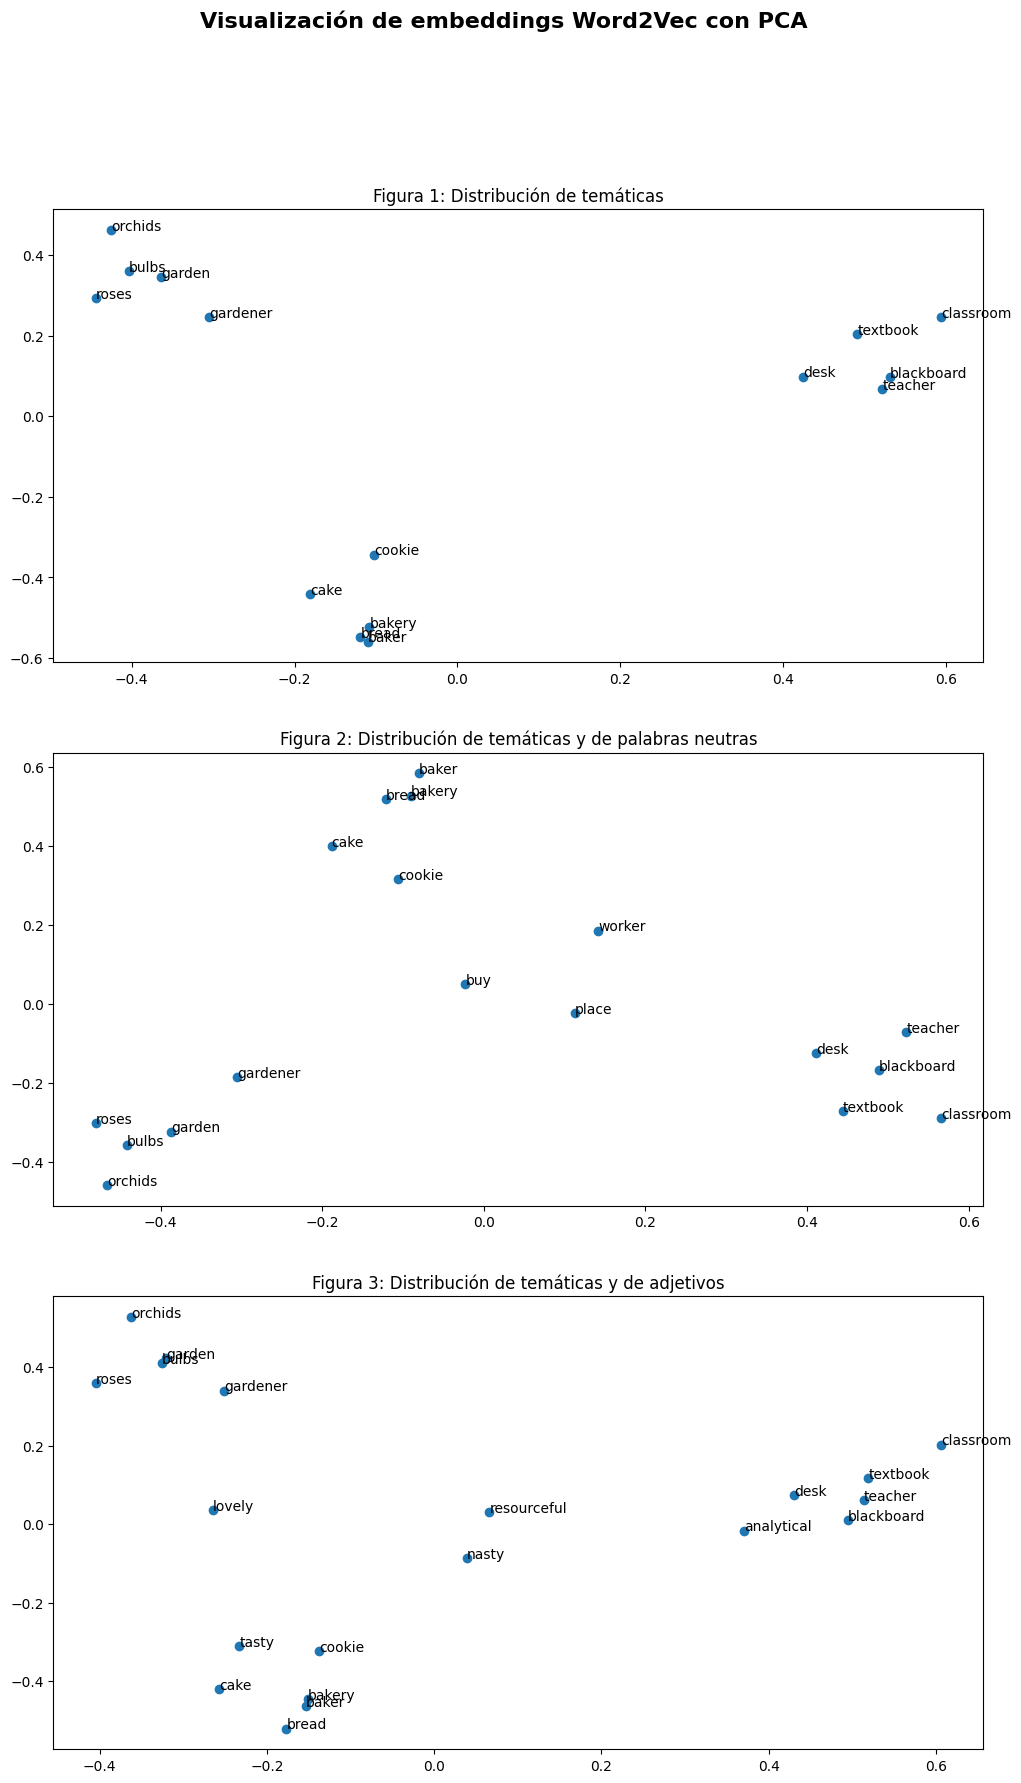

In [151]:
# Palabras de la varias temáticas
# Versión base
palabras1 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom']
vectores1 = [model[i] for i in palabras1]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords1 = pca.fit_transform(vectores1)


# Versión con palabras de semántica compartida:
palabras2 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom', 'place', 'worker', 'buy']
vectores2 = [model[i] for i in palabras2]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords2 = pca.fit_transform(vectores2)


# Versión con palabras de semántica compartida:
palabras3 = ['baker', 'bread', 'cookie', 'cake', 'bakery', 'gardener', 'roses', 'bulbs', 'orchids', 'garden', 'teacher', 'blackboard', 'textbook', 'desk', 'classroom', 'analytical', 'tasty', 'lovely', 'nasty', 'resourceful']
vectores3 = [model[i] for i in palabras3]

# Reducimos a 2D con PCA 
pca = PCA(n_components=2)
coords3 = pca.fit_transform(vectores3)



# Visualización
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
fig.suptitle('Visualización de embeddings Word2Vec con PCA', fontsize=16, fontweight='bold')

# Gráfico base
ax1 = axes[0]
ax1.scatter(coords1[:,0], coords1[:,1])
for i, palabra in enumerate(palabras1):
    ax1.annotate(palabra, (coords1[i,0], coords1[i,1]))
ax1.set_title("Figura 1: Distribución de temáticas")

# Gráfico con palabras de semántica compartida
ax2 = axes[1]
ax2.scatter(coords2[:,0], coords2[:,1])
for i, palabra in enumerate(palabras2):
    ax2.annotate(palabra, (coords2[i,0], coords2[i,1]))
ax2.set_title("Figura 2: Distribución de temáticas y de palabras neutras")

# Gráfico con adjetivos
ax3 = axes[2]
ax3.scatter(coords3[:,0], coords3[:,1])
for i, palabra in enumerate(palabras3):
    ax3.annotate(palabra, (coords3[i,0], coords3[i,1]))
ax3.set_title("Figura 3: Distribución de temáticas y de adjetivos")

plt.show()


Para este apartado hemos utilizado por temátca:
- 1 profesión.
- 3 objetos relacionados con dicha profesión.
- 1 espacio en el que se desarrolle.

Al utilizar palabras de distintas temáticas podemos observar como tienden a formar clusters, permitiendo una clara diferenciación entre campos semánticos (**Figura 1**). 

No obstante, hay que tener cuidado con palabras que puedan ser neutras/pertenecer a varios campos semánticos como `buy`, `place` y `worker` ya que estas se colocarían en zonas más centrales (**Figura 2**).

Además, podemos jugar con ello y observar qué adjetivos se asocian más con qué profesión como `tasty`, `analytical` y `lovely`; que se corresponden con las temáticas de panadería, enseñanza y jardinería respectivamente. A su vez vemos como otros adjetivos son neutros como `resourceful` y `nasty` (**Figuara 3**).


### Ejercicio 2: Valoración de sesgos en embeddings

Usando el modelo Word2Vec cargado, analiza posibles sesgos de género midiendo qué tan similares son ciertas profesiones a las palabras "man" y "woman".

Selecciona una lista de profesiones (p. ej., "doctor", "nurse", "engineer", "teacher", "secretary", "scientist", "housekeeper") y calcula su similitud con ambas palabras.

Observa si el modelo asocia algunas profesiones más fuertemente con "man" o con "woman", lo que podría indicar un sesgo aprendido a partir del corpus de entrenamiento.

##### Discute brevemente los resultados.

In [ ]:
# Lista de profesiones a evaluar
profesiones = ['doctor', 'nurse', 'engineer', 'teacher', 'secretary', 'scientist', 'housekeeper']

# TO DO: comparar las similitudes de cada profesión con 'man' y 'woman'

### Ejercicio 3: Representación de una oración mediante un embedding

Implementa una función `embedding_oracion` que obtenga el vector representativo de una oración calculando el promedio (p. ej., usando `mean` de `numpy`) de los embeddings de sus palabras.

Usa esta función para comparar varias oraciones y medir su similitud semántica mediante la distancia coseno (`model.cosine_similarities`) entre sus embeddings.

Observa si oraciones con significados parecidos (p. ej., "The cat sat on the mat" y "A dog rested on the rug") presentan una similitud mayor que las que hablan de temas distintos (p. ej., "I like pizza and pasta").

##### Discute brevemente los resultados.

In [ ]:
import numpy as np

def embedding_oracion(oracion):
    # TO DO

o1 = "The cat sat on the mat"
o2 = "A dog rested on the rug"
o3 = "I like pizza and pasta"

sim_1_2 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o2)])[0]
sim_1_3 = model.cosine_similarities(embedding_oracion(o1), [embedding_oracion(o3)])[0]

print(f"Similitud o1-o2: {sim_1_2:.3f}")
print(f"Similitud o1-o3: {sim_1_3:.3f}")

### Ejercicio 4: Medida de la coherencia semántica de una oración

Implementa una función `coherencia_oracion` que calcule la coherencia semántica de una oración midiendo la similitud promedio entre los embeddings de palabras consecutivas.

Aplica la función a oraciones con sentido ("the cat sat on the mat") y a oraciones absurdas ("the banana drove a spaceship") para observar cómo varía el nivel de coherencia calculado por el modelo.

##### Discute brevemente los resultados.

In [ ]:
def coherencia_oracion(oracion):
    # TO DO

print(coherencia_oracion("the cat sat on the mat"))
print(coherencia_oracion("the banana drove a spaceship"))

### Ejercicio 5: Análisis de la reciprocidad entre vecinos semánticos

Implementa una función `vecinos_reciprocos` que evalúe si la relación de similitud entre palabras es recíproca: es decir, si una palabra A considera a B como uno de sus vecinos más cercanos, y B también considera a A dentro de sus vecinos.

Aplica esta función a varias palabras y calcula el porcentaje de vecinos recíprocos para cada una.

##### Reflexiona sobre los resultados y qué pueden revelar acerca de la estructura del espacio de embeddings y las asimetrías en las relaciones de similitud.

In [ ]:
def vecinos_reciprocos(palabra, topn=5):
    # TO DO

for w in ['king', 'dog', 'music']:
    print(f"{w}: {vecinos_reciprocos(w)*100:.1f}% de vecinos son recíprocos")